In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text
import matplotlib.dates as mdates
import seaborn as sns

In [85]:
user = "aabounak"
password = "mysecretpassword"
host = "localhost"
port = "5432"
database = "piscineds"

def connect_to_postgres():
  return create_engine(
    url=f"postgresql://{user}:{password}@{host}:{port}/{database}"
  )

In [86]:
engine = connect_to_postgres()

In [87]:
with engine.connect() as connection:
  result = connection.execute(text('select * from customers'))
  data = result.fetchall()

columns_names = result.keys()
df = pd.DataFrame(data, columns=columns_names)
df.head()

In [ ]:
sns.set_style("darkgrid")

### Exercise 00

<AxesSubplot: ylabel='event_type'>

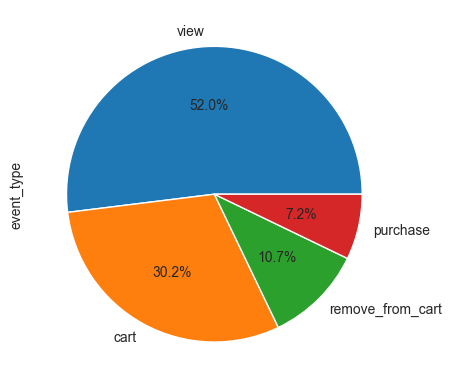

In [ ]:
df['event_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')

### Exercise 01

In [ ]:
df['event_time'] = pd.to_datetime(df['event_time'])
filtered_data = df[(df['event_type'] == 'purchase')]

In [ ]:
filtered_data['year'] = filtered_data['event_time'].dt.year
filtered_data['month'] = filtered_data['event_time'].dt.month
filtered_data['day'] = filtered_data['event_time'].dt.day

/var/folders/6s/mx7pbvk52nv491g2tc_gtggw0000gn/T/ipykernel_47207/1658810200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['year'] = filtered_data['event_time'].dt.year
/var/folders/6s/mx7pbvk52nv491g2tc_gtggw0000gn/T/ipykernel_47207/1658810200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['month'] = filtered_data['event_time'].dt.month
/var/folders/6s/mx7pbvk52nv491g2tc_gtggw0000gn/T/ipykernel_47207/1658810200.py:3: SettingWithCopyWarning: 
A value is trying to be set

<AxesSubplot: xlabel='Date', ylabel='Number of customers'>

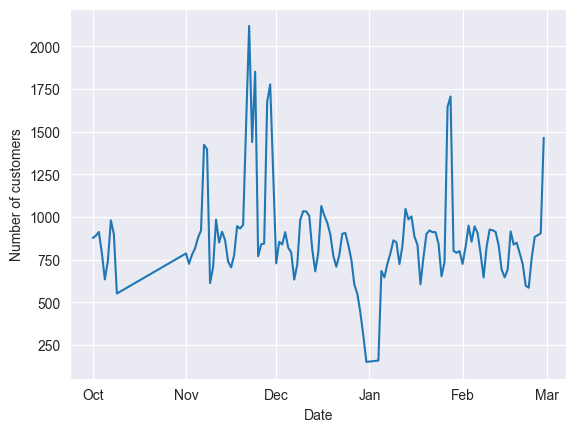

In [ ]:
daily_customer_counts = filtered_data.groupby(['year', 'month', 'day'])['user_id'].nunique().reset_index()
daily_customer_counts['date'] = pd.to_datetime(daily_customer_counts[['year', 'month', 'day']].astype(str).agg('-'.join, axis=1))

plt.ylabel('Number of customers')
plt.xlabel('Date')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

sns.lineplot(data=daily_customer_counts, x='date', y='user_id')

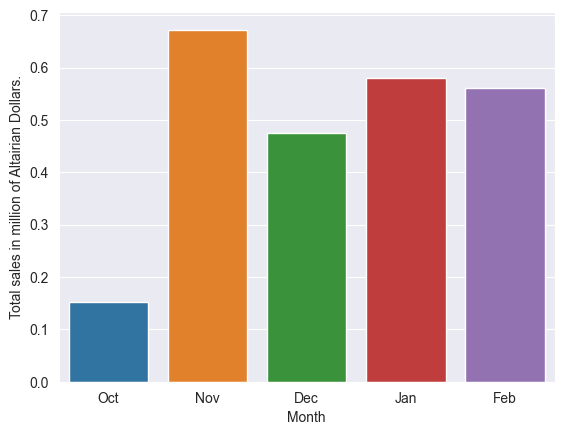

In [ ]:
total_sales = filtered_data.groupby(['year', 'month'])['price'].sum().reset_index()
total_sales['date'] = pd.to_datetime(total_sales[['year', 'month']].astype(str).agg('-'.join, axis=1)).dt.strftime('%b')

total_sales['price_in_million'] = total_sales['price'] / 1000000

sns.barplot(data=total_sales, x='date', y='price_in_million')

plt.xlabel('Month')
plt.ylabel('Total sales in million of Altairian Dollars.')
plt.show()

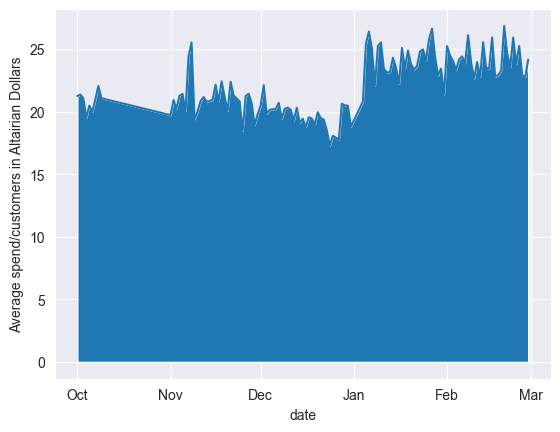

In [ ]:
total_sales = filtered_data.groupby(['year', 'month', 'day'])['price'].sum().reset_index()
merged_data = pd.merge(total_sales, daily_customer_counts, on=['year', 'month', 'day'])
merged_data['average_spend_per_customer'] = merged_data['price'] / merged_data['user_id']
merged_data['date'] = pd.to_datetime(merged_data[['year', 'month', 'day']].astype(str).agg('-'.join, axis=1))

sns.lineplot(data=merged_data, x='date', y='average_spend_per_customer')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b')) 
plt.fill_between(merged_data['date'], merged_data['average_spend_per_customer'])
plt.ylabel('Average spend/customers in Altairian Dollars')
plt.show()


### Ex02

count    500975.000000
mean          4.872330
std           8.737975
min         -79.370000
25%           1.590000
50%           3.000000
75%           5.380000
max         327.780000
Name: price, dtype: float64


<AxesSubplot: xlabel='price'>

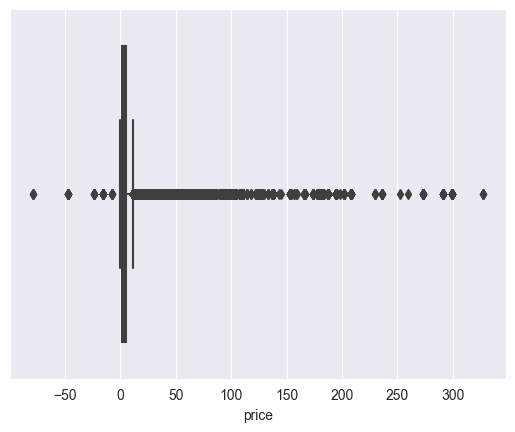

In [ ]:
copy_df = filtered_data.copy()
copy_df['price'] = copy_df['price'].astype(float)

print(copy_df['price'].describe())
sns.boxplot(data=copy_df, x='price')

<AxesSubplot: xlabel='price'>

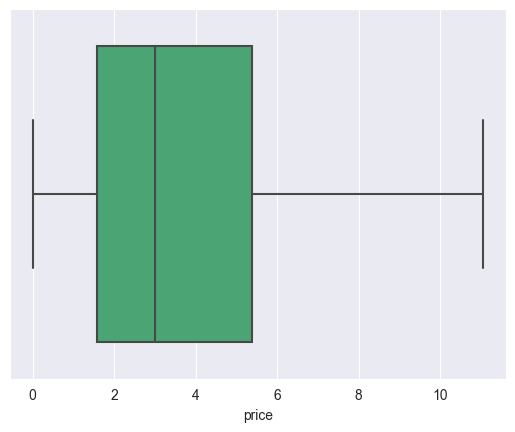

In [ ]:
sns.boxplot(data=copy_df, x='price', showfliers=False, color='mediumseagreen')

In [ ]:
# Average basket size:
# Refers to the number of products a customer buys per single transaction.
# This is calculated as the total number of units sold divided by total transactions.
# Average basket size = total number of units sold/total number of transactions.

# sns.boxplot(data=merged_data, x='average_spend_per_customer')

### Ex03

Text(0, 0.5, 'Customers')

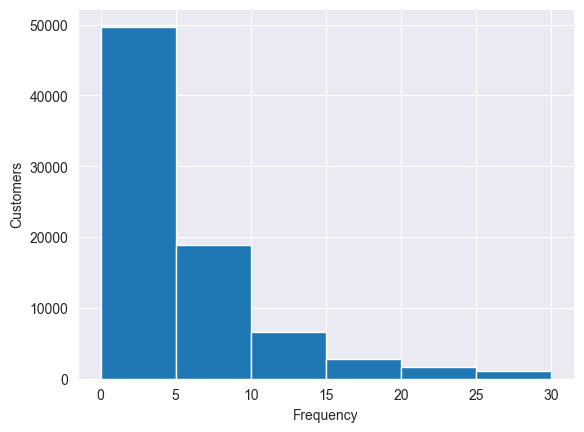

In [ ]:
order_freq = filtered_data.groupby('user_id')['user_id'].count().sort_values(ascending=False)
order_freq.plot(kind='hist', bins=range(0, 35, 5))

plt.xlabel('Frequency')
plt.ylabel('Customers')